<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/4_4_stats_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install nolds
!pip install hurst
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


In [13]:
# !pip install nolds
import numpy as np
import nolds
np.random.seed(1)
time_series = np.random.normal(0, 1, 100)

# time_series = [0.29875031, 0.25506379, 0.75053665, 0.99802279, 0.53397792,
#        0.94420272, 0.39661011, 0.10668245, 0.40877383, 0.29612777,
#        0.49340696, 0.65704368, 0.46105022, 0.93516051, 0.88476482,
#        0.7019776 , 0.48968491, 0.13168728, 0.39701367, 0.70440154,
#        0.28488552, 0.10398808, 0.90789846, 0.70905081, 0.61527643,
#        0.79249891, 0.83564604, 0.483459  , 0.88118825, 0.91641901,
#        0.2715511 , 0.60754536, 0.52658403, 0.53794578, 0.93766309,
#        0.3051887 , 0.98343398, 0.90213121, 0.45872289, 0.81745326,
#        0.76904699, 0.67789497, 0.31983389, 0.19645099, 0.6715277 ,
#        0.8429733 , 0.01625279, 0.64280338, 0.44287302, 0.89808776,
#        0.32147293, 0.47418481, 0.5147671 , 0.14043952, 0.7128923 ,
#        0.83047635, 0.05790928, 0.29138882, 0.03804468, 0.9565441 ,
#        0.66716882, 0.96420042, 0.53149428, 0.80206852, 0.37441398,
#        0.35381903, 0.37826782, 0.65786213, 0.35945315, 0.90036745,
#        0.98327487, 0.03042652, 0.19362329, 0.11224999, 0.04236405,
#        0.22774099, 0.44679332, 0.83699037, 0.22182403, 0.49394526,
#        0.92961874, 0.66721471, 0.79807902, 0.55099397, 0.98046646,
#        0.58866215, 0.04551071, 0.1979828 , 0.40477363, 0.60127717,
#        0.77193087, 0.41308613, 0.71005831, 0.7898695 , 0.3172602 ,
#        0.97927024, 0.6496565 , 0.88099806, 0.55593769, 0.74160311]

# Вычисление коэффициента Херста
H = nolds.hurst_rs(time_series)

print(f"Hurst exponent: {H}")

Hurst exponent: 0.5787644518175196


1. coef_hurst -

Коэффициент Херста показывает, насколько "предсказуемым" или "непредсказуемым" является временной ряд на долгом временном промежутке. Если коэффициент близок к 0.5, это означает, что временной ряд ведет себя как случайное блуждание без долгосрочных закономерностей. Если коэффициент больше 0.5, это указывает на то, что в ряде есть долгосрочные тенденции или циклы.

H < 0.5: временной ряд имеет антипериодическую (антикоррелированную) структуру, т.е. вероятность того, что последующее значение будет меньше предыдущего, выше, чем 0.5.
H = 0.5: временной ряд является случайным блужданием (белым шумом) без долгосрочной зависимости.
0.5 < H < 1: временной ряд обладает долгосрочной положительной зависимостью, т.е. вероятность того, что следующее значение будет больше предыдущего, выше, чем 0.5.



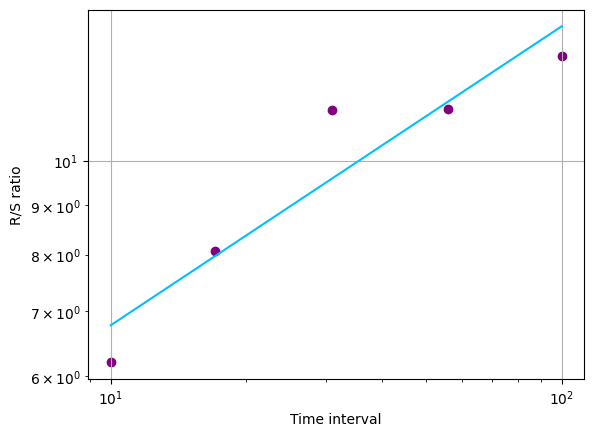

H=0.3079, c=3.3333


In [5]:
# !pip install hurst
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

# Use random_walk() function or generate a random walk series manually:
# series = random_walk(99999, cumprod=True)
# np.random.seed(42)
# random_changes = 1. + np.random.randn(99999) / 1000.
# series = np.cumprod(random_changes)  # create a random walk from random changes

# Evaluate Hurst equation
H, c, data = compute_Hc(time_series, kind='price', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [14]:
import numpy as np
from scipy.fft import fft
from scipy.stats import entropy


# Частота дискретизации
fs = 1

# Вычисление дискретного преобразования Фурье
X = fft(time_series)
amplitude_spectrum = 2 / len(time_series) * np.abs(X[:len(time_series) // 2])

# Нормализация амплитудного спектра
amplitude_spectrum_norm = amplitude_spectrum / amplitude_spectrum.sum()

# Вычисление энтропии Шеннона амплитудного спектра
spectral_entropy = entropy(amplitude_spectrum_norm, base=2)

print(f"Spectral entropy (FFT method): {spectral_entropy}")

Spectral entropy (FFT method): 5.4808838900105465


2. feat_spectral -

Спектральная энтропия (Шеннона) представляет собой меру разнообразия или хаоса в спектре мощности временного ряда. Чем выше значение спектральной энтропии, тем более сложный или разнообразный спектр мощности временного ряда.

Расшифровать спектральную энтропию можно следующим образом:

Низкое значение спектральной энтропии (близкое к 0) может указывать на то, что спектр мощности временного ряда содержит основные частоты, что может свидетельствовать о более упорядоченной или предсказуемой структуре временного ряда.
Высокое значение спектральной энтропии (больше 1) может указывать на более сложный или разнообразный спектр мощности временного ряда, что может указывать на более хаотическую или менее предсказуемую структуру временного ряда.

In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox
box_pierce = acorr_ljungbox(time_series,boxpierce=True)
box_pierce['result'] = box_pierce.apply(lambda row: 'белый шум' if row['lb_pvalue'] >= 0.05 and row['bp_pvalue'] >= 0.05 else 'не белый шум', axis=1)
print(box_pierce)

      lb_stat  lb_pvalue    bp_stat  bp_pvalue     result
1    0.157758   0.691229   0.153118   0.695573  белый шум
2    0.164277   0.921144   0.159381   0.923402  белый шум
3    6.192784   0.102598   5.892373   0.116966  белый шум
4    6.846048   0.144251   6.507210   0.164337  белый шум
5    7.263969   0.201737   6.896450   0.228456  белый шум
6   11.072828   0.086152  10.406575   0.108542  белый шум
7   13.876090   0.053430  12.962490   0.073028  белый шум
8   13.946394   0.083173  13.025902   0.110962  белый шум
9   13.973004   0.123289  13.049643   0.160373  белый шум
10  16.498797   0.086216  15.278283   0.122241  белый шум


3. box_pierce +

Статистика Бокса-Пирса используется для проверки гипотезы о том, является ли временной ряд случайным шумом (белым шумом) или содержит значимую автокорреляцию. Это позволяет оценить, насколько случайными или предсказуемыми являются значения временного ряда.

Путем вычисления статистики Бокса-Пирса и соответствующего p-значения можно определить, существует ли значимая автокорреляция в ряде на различных лагах. Если p-значение меньше уровня значимости (например, 0.05), это может указывать на то, что ряд не является белым шумом и содержит автокорреляцию.

4. ljung_box +

Статистика Юнга-Бокса используется для проверки гипотезы о том, является ли временной ряд случайным шумом (белым шумом) или содержит значимую автокорреляцию. Это инструмент для оценки случайности или предсказуемости значений временного ряда.

 если p-значение, полученное при использовании статистики Юнга-Бокса, больше выбранного уровня значимости (например, 0.05), то нет оснований отвергать нулевую гипотезу о том, что ряд является белым шумом.


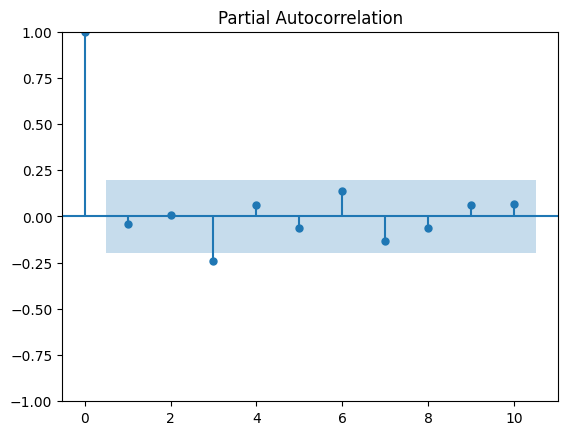

Partial Autocorrelation Function (PACF): 
 [ 1.         -0.0395256   0.00652338 -0.24666281  0.06682555 -0.0643397
  0.14666935 -0.14524781 -0.0639076   0.0697765   0.07903094]


In [17]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Вычисление частичной автокорреляции
pacf = sm.tsa.stattools.pacf(time_series, nlags=10)

# Визуализация частичной автокорреляции
plot_pacf(time_series, lags=10)
plt.show()

print(f"Partial Autocorrelation Function (PACF): \n {pacf}")

5. feat_pacf +

Частичная автокорреляция (PACF) - это мера автокорреляции между значениями временного ряда после того, как были удалены влияния корреляций на более коротких задержках. Она позволяет определить прямую зависимость между значением ряда в момент времени t и его значениями в прошлом, учитывая влияние промежуточных значений временного ряда. PACF часто используется для определения порядка авторегрессионной модели (AR) в анализе временных рядов.




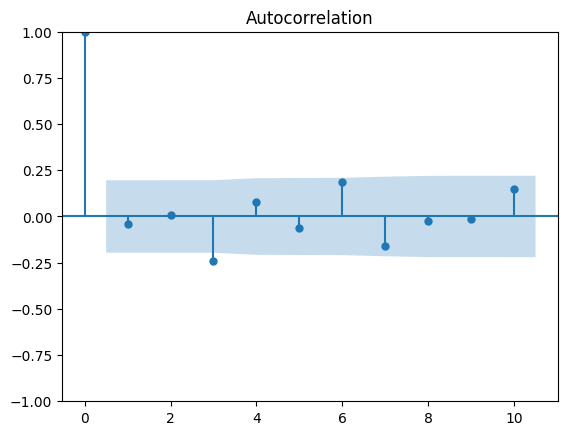

Autocorrelation Function (ACF): 
 [ 1.         -0.03913035  0.00791395 -0.23943666  0.07841155 -0.06238911
  0.18735326 -0.15987231 -0.0251816  -0.01540815  0.14928633]


In [19]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Вычисление полной автокорреляции
acf = sm.tsa.stattools.acf(time_series, nlags=10)

# Визуализация полной автокорреляции
plot_acf(time_series, lags=10)
plt.show()

print(f"Autocorrelation Function (ACF): \n {acf}")

Полная автокорреляция (ACF) для временного ряда показывает корреляцию между значениями ряда на разных задержках (лагах), учитывая влияние всех промежуточных значений между этими лагами.

Когда мы говорим о частичной автокорреляции (PACF), мы пытаемся измерить связь между значениями временного ряда на разных лагах, но с учетом промежуточных значений между этими лагами. Другими словами, PACF отображает автокорреляцию между значениями временного ряда на разных лагах, но после того, как были удалены влияния корреляций на более коротких задержках.

Давайте представим, что у нас есть временной ряд температуры каждый час. Если мы хотим узнать, есть ли зависимость между температурой в 6 утра и в 18 вечера, мы можем посмотреть на частичную автокорреляцию на лаге 12 (так как 18-6 = 12), учитывая при этом влияние промежуточных значений температуры в другие часы дня.

Таким образом, PACF позволяет нам определить прямую зависимость между значениями временного ряда на различных моментах времени, учитывая при этом влияние промежуточных значений временного ряда.

In [24]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss


print('Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)')
#KPSS
kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')
# check p-value against significance level
if p_value < 0.05:
    print('I По p-value, ряд НЕ стационарен метод KPSS')
else:
    print('I По p-value, ряд стационарен метод KPSS')

# check KPSS statistic against critical value

if abs(kpss_stat) > abs(max(crit.values())):
    print('II По значению KPSS статистики, ряд НЕ стационарен метод KPSS')
else:
    print('II По значению KPSS статистики, ряд стационарен метод KPSS')
print()
print('kpss_stat', kpss_stat)
print('p_value', p_value)
print('lags', lags)
print('crit', crit)

Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test)
I По p-value, ряд стационарен метод KPSS
II По значению KPSS статистики, ряд стационарен метод KPSS

kpss_stat 0.0477617848370993
p_value 0.1
lags 1
crit {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


<ipython-input-24-50170cd305df>:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat,p_value, lags,crit = kpss(time_series,regression = 'ct')


6. unitroot_kpss +

Тест на стационарность КПСС (Kwiatkowski-Phillips-Schmidt-Shin test) используется для проверки, является ли временной ряд стационарным. Этот тест основан на проверке гипотезы о наличии единичного корня в ряде (нестационарности). Если значение статистики теста меньше критического значения, то нулевая гипотеза о наличии единичного корня отвергается, что указывает на стационарность ряда.


Стационарный временной ряд обладает следующими признаками:

Постоянное среднее значение: среднее значение ряда остается постоянным во времени.
Постоянная вариация: дисперсия ряда остается постоянной во времени.
Постоянная автоковариация: автоковариация между значениями ряда на разных задержках (лагах) остается постоянной во времени.
Стационарность ряда важна для многих методов анализа временных рядов, поскольку многие модели и методы предполагают стационарность данных.

это линейные вычисления

In [26]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print('Тест на стационарность Дики-Фуллера (Dickey-Fuller test')
adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(time_series)
print()
print('kpss_stat', adf)
print('pvalue', pvalue)
print('usedlag', usedlag)
print('nobs', nobs)
print('critical_values', critical_values)

print('Results of Dickey-Fuller Test:')

if pvalue <= 0.05:
    print('I По p-value, ряд стационарен метод ADF')
else:
    print('I По p-value, ряд НЕ стационарен метод ADF')

# check ADF statistic against critical value
if abs(adf) > abs(max(critical_values.values())):
    print('II По значению ADF статистики, ряд стационарен, метод ADF' )
else:
    print('II По значению ADF статистики, ряд НЕ стационарен, метод ADF')
# print('resstore', resstore)

print()


Тест на стационарность Дики-Фуллера (Dickey-Fuller test

kpss_stat -7.158368056683855
pvalue 3.0129660136094903e-10
usedlag 2
nobs 97
critical_values {'1%': -3.4996365338407074, '5%': -2.8918307730370025, '10%': -2.5829283377617176}
Results of Dickey-Fuller Test:
I По p-value, ряд стационарен метод ADF
II По значению ADF статистики, ряд стационарен, метод ADF



7. unitroot_pp +

Тест Филлипса-Перрона (ADF) используется для проверки наличия единичного корня во временном ряде, что указывает на нестационарность ряда. Если значение статистики ADF меньше критического значения и p-значение меньше уровня значимости, то нулевая гипотеза о наличии единичного корня отвергается, что указывает на стационарность ряда.



Тест Филлипса-Перрона (ADF) и Тест на стационарность КПСС (KPSS) имеют различные цели и подходы к проверке стационарности временного ряда.

Тест Филлипса-Перрона (ADF) используется для проверки наличия единичного корня во временном ряде, что указывает на нестационарность ряда. Он тестирует нулевую гипотезу о наличии единичного корня в ряде.
Тест на стационарность КПСС (KPSS) используется для проверки, является ли временной ряд стационарным. Он тестирует нулевую гипотезу о стационарности ряда против альтернативной гипотезы о наличии единичного корня или детерминированного тренда в ряде.
Таким образом, ADF и KPSS тестируют разные аспекты стационарности временного ряда: ADF фокусируется на наличии единичного корня, в то время как KPSS фокусируется на общей стационарности ряда.


In [29]:
from pmdarima.arima.utils import ndiffs
import pandas as pd


n_diffs = ndiffs(time_series, test='kpss')

print("ndiffs нужно ли делать дифференцацию:", n_diffs)


ndiffs нужно ли делать дифференцацию: 0


8. unitroot_ndiffs +

Метод ndiffs из библиотеки pmdarima используется для автоматического определения оптимального количества различий, необходимых для стационарности временного ряда перед применением модели ARIMA.

Когда вы используете ndiffs с параметром test='kpss', метод будет проводить тест на стационарность с использованием KPSS (Kwiatkowski-Phillips-Schmidt-Shin) теста. Результатом будет количество различий, необходимых для стационарности ряда.

Если значение n_diffs равно 0, это означает, что временной ряд уже стационарен и дополнительные различия не требуются. Если значение n_diffs равно 1, это означает, что для стационарности ряда требуется одно различие.

Таким образом, результат n_diffs позволяет определить оптимальное количество различий для стационарности временного ряда перед построением модели ARIMA.


In [30]:
from pmdarima.arima.utils import nsdiffs
import pandas as pd

# Определение количества сезонных разностей
n_seasonal_diffs = nsdiffs(time_series,m=4)

print("nsdiffs Сколько diff надо применить к данным:", n_seasonal_diffs)



nsdiffs Сколько diff надо применить к данным: 0


9. unitroot_nsdiffs +

указывает количество сезонных различий, необходимых для стационарности ряда.